### 背后机制(Under the hood)
从线性SVM分类器开始，解释SVM是如何做预测的并且算法是如何工作的。

在训练模型章节中，将所有模型参数放在一个矢量$\vec \theta$中，包括偏置项$\theta_0$，$\theta_1$到$\theta_n$的输入特征权重，和增加一个偏差输入$x_0=1$到所有样本中。

在这里将使用不同的符号约定：偏置项被命名为$b$，特征权重向量被称为$\vec w$，在输入特征向量中不再添加偏置特征。

#### 1. 决策函数和预测
线性SVM分类器通过计算函数$w\cdot x+b=w_1x_1+w_2x_2+...+w_nx_n+b$来预测新样本的类别：
* 如果结果是正的，预测类别$\hat{y}$是正类，为1
* 如果结果是负的，预测类别$\hat{y}$是负类，为0

公式为：
$\hat{y}=\begin{cases} 0, if w^T\cdot x+b<0\\ 1,ifw^T\cdot x+b\geq0 \end{cases}$

训练线性SVM分类器意味着找到$w$值和$b$值使得这一个间隔尽可能大，同时避免间隔违规（硬间隔）或限制它们（软间隔）

#### 2.训练目标
决策函数的斜率：它等于权重向量的范数$\parallel w\parallel$。

权重向量$w$越小，间隔越大。所以我们的目标是最小化$\parallel w\parallel$，从而获得大的间隔。

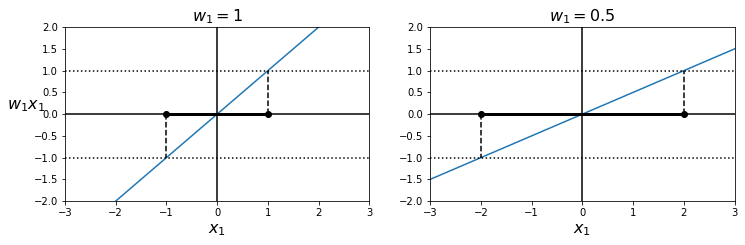

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    
    plt.plot(x1_lim, [1, 1], "k:")  # 画y=1的虚线
    plt.plot(x1_lim, [-1, -1], "k:")  # 画y=-1的虚线
    
    plt.axhline(y=0, color='k')  # 画X坐标轴
    plt.axvline(x=0, color='k')  # 画Y坐标轴
    
    plt.plot([m, m], [0, 1], "k--")  # 画纵向虚线
    plt.plot([-m, -m], [0, -1], "k--")
    
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)  # 画[-m,m]直线，注意'k-o'表示法，不仅画出直线还标志出两头的起止点
    
    plt.axis(x1_lim + [-2, 2])
    
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)
    

plt.figure(figsize=(12, 3.2))

plt.subplot(121)
plot_2D_decision_function(1, 0)
plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)

plt.show()

从图中可以看到，将斜率除以2，决策函数等于$\pm1$的点将会离决策边界原来的两倍远

#### 2.1避免间隔违规(硬间隔)
* 对于正的训练样本，需要决策函数大于1
* 对于负的训练样本，小于-1

对负样本(即$y^{(i)}=0$)定义$t^{(i)}=-1$；对正样本(即$y^{(i)}=1$)定义$t^{(i)}=1$。则可以将所有的样本表示为$t^{(i)}(w^Tx^{(i)}+b)\geq1$

硬间隔线性SVM分类器表示为下列约束优化问题：

$minimize_{w,b}\quad \frac{1}{2}w^T\cdot w$

$subject\ to \quad t^{(i)}(w^T\cdot x^{(i)}+b)\geq 1\quad for\ i=1,2,\dots,m$

#### 2.2 获得软间隔的目标
应用松弛变量(slack variable)$\zeta^{(i)}\geq0$，表示第$i$个样本允许违规间隔的程度
现在有两个不一致的目标：
* 一个是使松弛变量尽可能的小，从而减小间隔违规
* 另一个是使$\frac{1}{2}w\cdot w$尽量小，从而增大间隔

超参数$C$发挥作用：它允许我们在两个目标之间权衡

约束优化问题为：

$minimize_{w,b,\zeta}\quad \frac{1}{2}w^T\cdot w+C\sum_{i=1}^{m}\zeta$

$subject\ to \quad t^{(i)}(w^T\cdot x^{(i)}+b)\geq 1-\zeta^{(i)}\quad and\quad \zeta^{(i)}\quad for\ i=1,2,\dots,m$

#### 3.二次规划
硬间隔和软间隔都是线性约束的凸二次规划优化问题。这些问题被称之为二次规划（QP）问题。

一般问题的公式为：

$minisize\quad \frac{1}{2}p^T\cdot H\cdot p+f^T\cdot p$

$subject\ to\quad A\cdot p\leq b$

$where\
\begin{cases}
\vec p\ is\ an\ n_p-dimensional\ vector(n_p=number\ of\ paramters)\\
\vec H\ is\ an\ n_p\times n_p\ matrix\\
\vec f\ is\ an\ n_p-dimensional\ vector\\
\vec A\ is\ an\ n_c\times n_p\ matrix(n_c=number\ of\ contraints)\\
\vec b\ is\ an\ n_c-dimensional\ vector 
\end{cases}$

可以很容易看到，如果用以下的方式设置QP的参数，将获得硬间隔线性SVM分类器的目标：
* $n_p=n+1,\ n $表示特征的数量（+1是偏置项）
* $n_c=m,\ m$表示训练样本数量
* $\vec H$是$n_c\times n_p$单位矩阵，除了左上角为0（忽略偏置项）
* $\vec f=0$，一个全为0的$n_p$维向量
* $b=1$，一个全为1的$n_c$维向量
* $a^{(i)}=t^{(i)}x^{(i)},\ x^{(i)}$等于$x^{(i)}$带一个额外的偏执特征$x_0=1$

所以训练硬间隔线性SVM分类器的一种方式是使用现有的QP解决方案，即上述的参数

然而使用核技巧我们将会看到一个不同的约束优化问题。

#### 3. 对偶问题
给定一个约束优化问题，即原始问题（primal problem），它可能表示不同但是和另一个问题紧密相连，称为对偶问题（dual problem）。

对偶问题的解通常对原始问题的解给出一个下界约束，在某些条件下可以获得相同的解。

幸运的是，SVM问题恰好满足这些条件，所以可以选择解决原始问题或者对偶问题，两者将会有相同解。

线性SVM的对偶形式表示为：

$$minisize_{\alpha} \quad \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha^{(i)}\alpha^{(j)}t^{(i)}t^{(j)}x^{(i)T}\cdot x^{(j)}\ -\ \sum_{i=1}^{m}\alpha^{(i)}$$

$$subject\ to\quad \alpha^{(i)}\geq 0\quad for\ i=1,2,\dots ,m$$

一旦找到最小化公式的向量$\vec \alpha$（使用QP解决方案），可以使用下面的方式计算$w$和$b$，从而使原始问题最小化。

$$w=\sum_{i=1}^{m}\hat{a}^{(i)}t^{(i)}x^{(i)}$$

$$\hat{b}=\frac{1}{n_s}\sum_{i=1\\ \hat{a}^{(i)}>0}(1-t^{(i)}(w^T\cdot x^{(i)}))$$

#### 4. 核化支持向量机